# Sklearn Workshop 1: Loan Prediction

- Prepare you for project
- We shall go through 3 case studies this week

Announcement:
- Next next week Friday we will meet, and we shall study how to deploy model to FastAPI
- Next next week Saturday no class -> project time
- Next next week Sunday: Presentation 9:00 - 12:00 - Each person 15 mins.

# Let's code!!

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## 1. Load the data

In [2]:
#get the data from google classroom
df_train = pd.read_csv("data/train_LoanPrediction.csv")
df_test  = pd.read_csv("data/test_LoanPrediction.csv")

In [3]:
#1. get the shape (rows, columns)
df_train.shape  #(614 rows, 13 columns)

#2. try .head()
df_train.head()

#3. try .describe()
df_train.describe()

#4. check whether our data class is balanced, using value_counts(normalize=True)
df_train['Loan_Status'].value_counts() #if you don't put normalize=True, will give you raw number

#our class is imbalanced....
#it means, we have to downsample Y, to equal N

Y    422
N    192
Name: Loan_Status, dtype: int64

### 1.1 Make the dataset valid

- this is not related to cleaning....this is about making the dataset valid....
- please help me downsample Y
- we only need to downsample the training set....because the training set is USED for training
- imbalanced class only affects the model during training


In [4]:
#1. set the cond = Y, and cond = N
condY = df_train.Loan_Status == 'Y'  #to 0 or 1
condN = df_train.Loan_Status == 'N'

#2.. df[condY].sample(n = 192)
#    df[condN].sample
#    we do this many times, do whole ML thing, and do the average....
df_trainY = df_train[condY].sample(n=192, random_state=999)
df_trainN = df_train[condN] #also 192

#3. concat these two dfs
df_train = pd.concat([df_trainY, df_trainN])

df_train.Loan_Status.value_counts()


Y    192
N    192
Name: Loan_Status, dtype: int64

### 2. EDA (Exploratory Data Analysis)
- What is the goal of EDA?
  - To identify promising features (e.g., ApplicantIncome) to predicting the target (e.g., Loan Status)

In [5]:
#0. Check the data type
df_train.dtypes
df_train.drop(columns = ['Loan_ID'], inplace=True)  #this is not a useful feature....
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

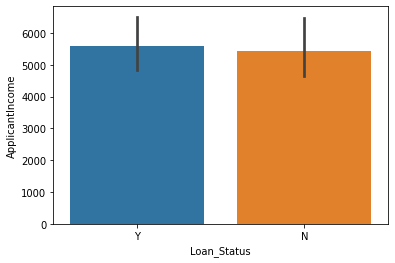

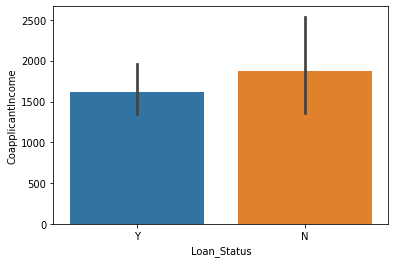

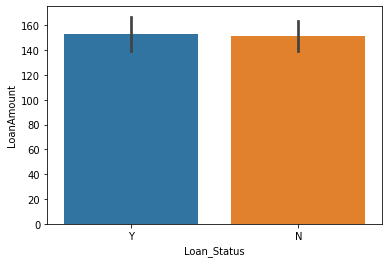

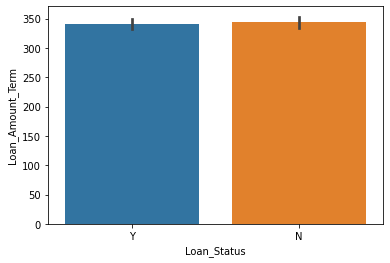

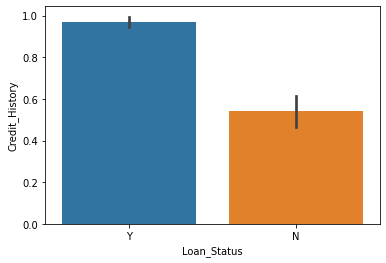

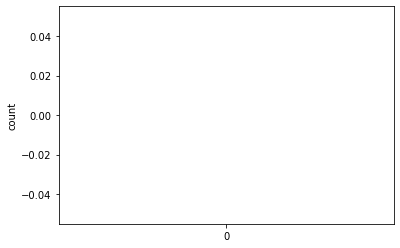

In [10]:
import seaborn as sns

#1. You want to divide into categorical and numerical columns using select_dtypes
df_train.dtypes
num_col = df_train.select_dtypes(include=['int64', 'float64'])
cat_col = df_train.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

#2. for numerical type, please do a bar plot with Loan Status
for col in num_col.columns:
    sns.barplot(x = df_train['Loan_Status'], y = df_train[col])
    plt.show()

#3. for categorial type, you may want to use countplot with Loan Status

    # sns.countplot()  #because categorical, you need to count, not simply use the magnitude...so cannot use bar...